<a href="https://colab.research.google.com/github/toche7/AI_ITM/blob/main/Lab5_Model_Selection_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Model Development

ขั้นตอนในการทำพัฒนาแบบจำลองสามารถแบ่งได้ 2 ขั้นตอนดังนี้

1. ขั้นตอนการประเมินแบบจำลอง \(Model Validation\)
2. ขั้นตอนการคัดเลือกแบบจำลอง \(Model Selection\)



## 5.1 Model Validation

ในการประเมินแบบจำลอง หมายถึงกระบวนการในการวัดประสิทธิภาพของแบบจำลอง เพื่อที่จะใช้ในกระบวนการคัดเลือกหรือเปรียบเทียบประสิทธิภาพระหว่างแบบจำลองซึ่งสามารถทำได้สองวิธีดังนี้

1. Hold\-Out Method
2. Cross\-Validation Method


### 5.1.1 Hold\-Out Method



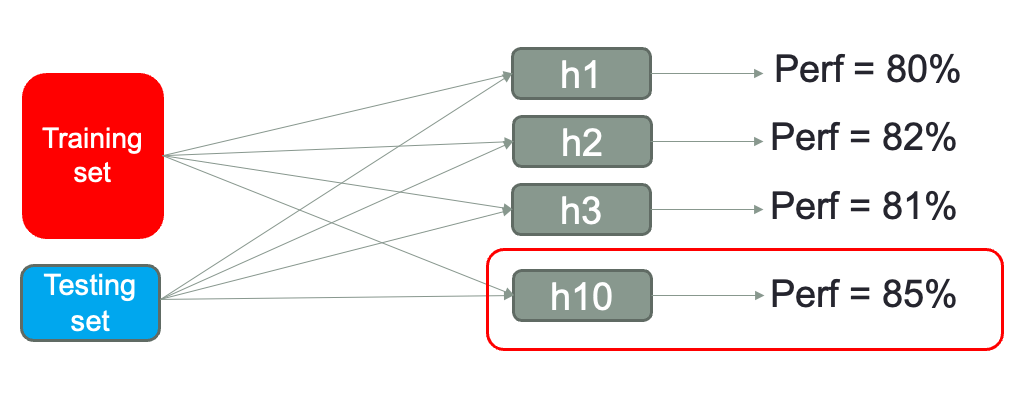

Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#




```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

```




```
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)[source]¶
```

ตัวแปรสำคัญในการใช้คำสั่ง
* *arrarys: ข้อมูลที่ใช้ในการแบ่งสามารถใส่เข้ามาหลายๆ ชุดพร้อมกัน ได้
* test_size: float หรือ int, default = None, ถ้าเป็น 0.0-1 ก็จะทำการแบ่งข้อมูลไปตามขนาดสัดส่วนของ test_size และส่วนที่เหลือจะไปเป็น train set ถ้าเป็นจำนวนเต็มก็จะหมายถึงค่าจำนวนข้อมูลที่จะแบ่งไป   แต่ถ้าเป็น None ก็จะกำหนดให้กำหนดเป็น 0.25
* train_size: float หรือ int, default = None, จะเป็นข้อมูลส่วนจะนำไปฝึกแบบจำลอง โดยจะเป็นแบ่งตามค่า float ที่กำหนด ถ้าเป็นเลขจำนวนเต็มก็จะกำหนดค่าตามนั้น ถ้าเป็น none ก็จะใช้ส่วนที่เหลือจาก test set มาใช้
* random_state: int, default = None, กำหนดค่า seed ให้กับตัวกำสร้าง random โดยค่านี้จะถูกใช้ในการทำ  shuffle ข้อมูลที่จะทำก่อนการแบ่ง


โดยจะส่งค่ากลับมา list ที่แบ่งออกเป็นสองส่วนแล้ว

**Note** การ import library จาก module เข้ามาใช้งาน
* "from" จะให้กำหนดเป้าหมายในการดึง module ออกมา
* "import" เป็นนำเข้า module เข้ามา จะดึงมาได้เฉพาะที่เป็น module (file) เท่านั้น
* "as" เป็นการตั้งชื่อเล่น เพื่อจะเรียกให้ง่ายขึ้น
* "import module_y "from" func_x "import"  จะดึงมาได้บางส่วนของ module



For example
``` python
import sklearn as sk
from sklearn.model_selection import train_test_split as tt
```



### Example 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


Create X array shape = (50,2) and y with shape = (50,)

split 70-30 for training and testing sets

### Example 2

Create NN Model and verfity by Train Test Dataset using Iris Data Set

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

#### ผลกระทบของการ random state และขนาดของการแบ่งข้อมูล

In [ ]:
n = 10
size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
print('size X_train: ', X_train.shape)
print('size X_test: ', X_test.shape)


In [ ]:
for i in range(1,n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=None)
  nn1 =  MLPClassifier(max_iter= 1000, solver='lbfgs',hidden_layer_sizes=(10,))
  nn1.fit(X_train, y_train)
  Acc = nn1.score(X_test, y_test)
  print('Acc: %.4f' % Acc )

#### ทดลอง
ทดลองปรับค่า  test_size ไปเป็น ค่าอื่น เช่น 0.3, 0.2, 0.1 และทดลองปรับค่า random_state = None'

### 5.1.2 Cross\-Validation Method



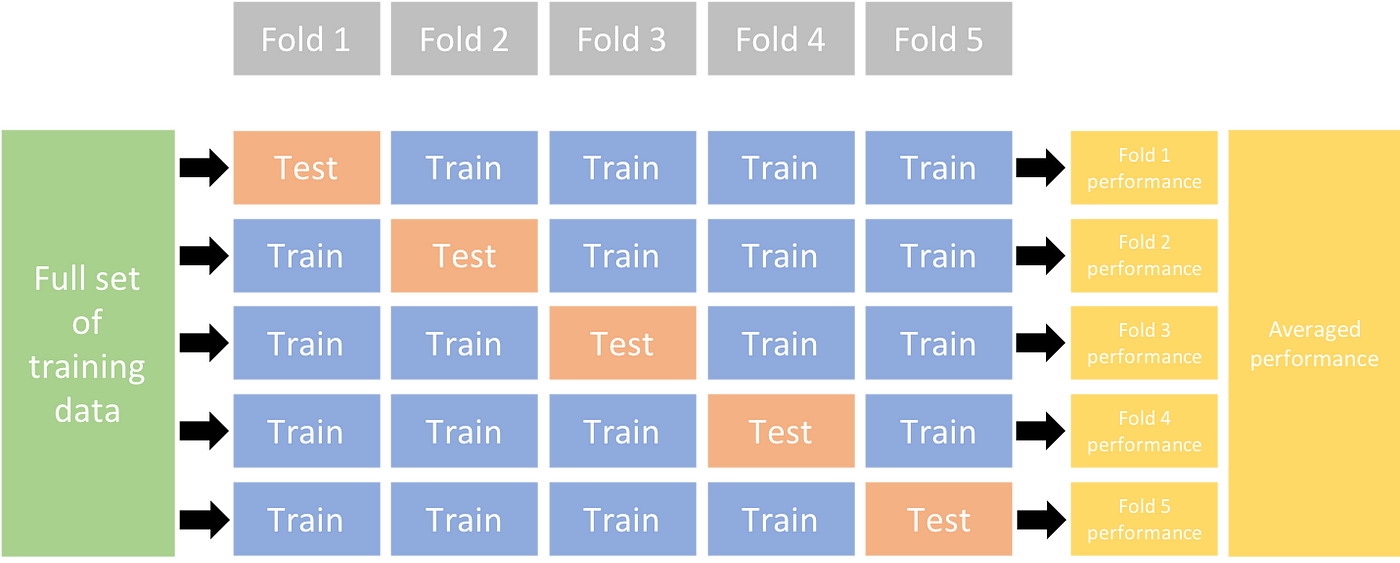

Theory

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html




``` python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelObject, X, y, cv= 5, scoring = 'f1_macro')
```



ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross validatoin โดยสามารถดูได้จาก  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Example 3

In [ ]:
from sklearn.model_selection import cross_val_score
nn = MLPClassifier(max_iter= 500, solver='lbfgs', hidden_layer_sizes=(10,))


ทดลองเปลี่ยนค่า scoring ไปเป็น cv = 10

ทดลองเปลี่ยนค่า scoring ไปเป็น scoring เป็น f1_macro และ cv เป็น 5


#### ทดลอง
ทดลองปรับค่า fold  (cv) ไปเป็น 10 fold ให้  score เป็น ‘precision’  แบบ  micro average แล้วทำการวัดผลอีกครั้ง

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

โดยหลักการแล้วนั้น  Cross\-Validation จะให้ความน่าเชื่อถือมากกว่าการใช้ Hold\-Out Method  ส่วนวิธีการ Hold\-Out Method ก็จะมีข้อดีในเรื่องของความเร็วในการประมวลผล โดยส่วนใหญ่แล้วถ้าการทดสอบไหนที่แบบจำลองมีขนาดใหญ่ หรือปริมาณข้อมูลขนาดใหญ่เราจะนิยมใช้เป็น Hold\-Out Method เช่นงานทางด้าน image processing และ  NLP เป็นต้น  ส่วนการทดลองใดที่สามารถทำได้เร็วก็จะนิยมทำด้วยวิธี Cross\-Validation



## 5.2 Model Selection

ในข้อมูลชุดหนึ่งนั้นเราสามารถที่จะสร้างแบบจำลองได้หลายประเภท โดยในแต่ละประเภทเราสามารถสร้างแบบจำลองที่แตกต่างด้วยการปรับพารามิเตอร์ที่เกี่ยวข้องให้แตกต่างกันออกไป สิ่งที่ได้ก็คือเราจะได้โมเดลที่มีประสิทธิภาพแตกต่างกันหลังจากนั้นเราจะเลือกเอาโมเดลที่มีประสิทธิภาพมากที่สุดไปใช้งาน

Hyperparameter Turing หมายถึงกระบวนการปรับพารามิเตอร์ที่เกี่ยวข้องเพื่อให้ได้ประสิทธิภาพมากที่สุด โดยจะต้องมีการทดสอบพารามิเตอร์ที่แตกต่างกันแล้วเอาค่าที่ดีที่สุดไปใช้งาน

https://scikit-learn.org/stable/modules/grid_search.html

การเลือกแบบจำลองนอกจากจะเลือกจากแบบจำลองชนิดเดียวกันแล้วเรายังจะต้องเปรียบเทียบแบบจำลองที่เป็นคนละชนิดกันโดยจะเปรียบเทียบแบบจำลองที่แตกต่างกันที่มีการเลือกพารามิเตอร์ที่ดีที่สุดออกมาแล้ว

Theory

https://scikit-learn.org/stable/modules/grid_search.html#grid-search


Library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV





```python
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(modelObject, parameters, cv = 5)
gridSearch.fit(X, y)

```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X, y \) | Fit the model according to the given training data. |


ตัวแปรแบบที่สำคัญ
* modelObject คือตัว object ของ model ที่จะใช้ในการประเมิน
* X,y คือชุดข้อมูลที่จะทำการประเมิน
* cv คือจำนวนการแบ่งข้อมูลที่จะทำการ cross validation
* scoring คือค่าการวัดที่จะทำการตรวจสอบด้วย cross
* parameters เป็น dictionary ของตัวแปรที่จะนำไปทำการค้นหา

### Example 4
Grid Search Cross-Validation with Neural Network

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
